# Projet 6 : Analysez les ventes d'une librairie

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import ensemble
from datetime import datetime
import scipy.stats as stats

In [63]:
# import des fichiers CSV extraits de la base de données de la librairie
df_clients_VIP = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P6/DAN-P6-donnees/df_clients_VIP.csv') 
df_client_part = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P6/DAN-P6-donnees/df_client_part.csv')
df_final = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P6/DAN-P6-donnees/df_final_1.csv')

# Mission_4 : Tests Statistiques

#### Correlation entre Catégorie et sexe (chi2)

La statistique du khi-deux est particulièrement adaptée pour les observations qualitatives (2 variables qualitatives)

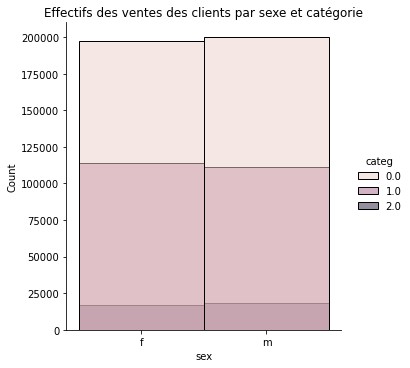

In [64]:
sns.displot(data=df_final, x='sex', hue='categ')
plt.title('Effectifs des ventes des clients par sexe et catégorie')
plt.show()

H0 = les 2 variables ne sont pas correlées

H1 = les 2 variables sont corrélées

Determination des degrés de libreté:

Degrés de liberté = ( nombre de modalités variable_A - 1 ) x ( nombre de modalités variable_B - 1 ) = (3-1)x(2-1)= 2

On obtient donc 2 degrés de liberté dans la table de contingence entre 'categ' et 'sex'.

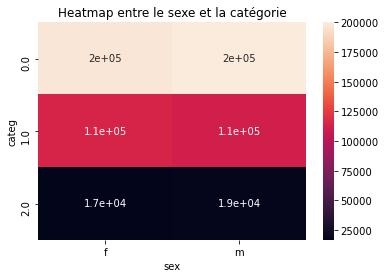

In [65]:
# Table de contingence
tab_contigence = pd.crosstab(df_final['categ'], df_final['sex'], margins=False)
sns.heatmap(tab_contigence, annot=True)
plt.title('Heatmap entre le sexe et la catégorie')
plt.show()

Ce test approximatif est valide si (règle de Cochran):
- Au moins 1 valeur dans chaque cellule de la table de contingence
- Il n’y a pas plus de 20% des valeurs plus petites que 5.

Ces conditions étant remplies, on peut proceder au calcul de la p-value.

In [66]:
# Test de Chi 2
import scipy.stats as stats
table = pd.crosstab(df_final['categ'], df_final['sex'], margins=False)
st_chi2, p, dof, expected = stats.chi2_contingency(table)
print('Test de Chi 2 (2 catégorielles)')
print('Stat = %.3f\np-value = %.35f' % (st_chi2, p))
print("Nombe de degrés de liberté=", dof)

#Test au seuil de 5%
if p > .05:
    print('H0: les 2 variables ne sont pas correlées')
else:
    print('H1: les 2 variables sont corrélées.')

Test de Chi 2 (2 catégorielles)
Stat = 142.441
p-value = 0.00000000000000000000000000000011732
Nombe de degrés de liberté= 2
H1: les 2 variables sont corrélées.


#### Correlation entre age et chiffre d'affaires (Pearson)

Le test statistique de Pearson est  utilisée pour voir la correlation entre 2 variables quantitatives.

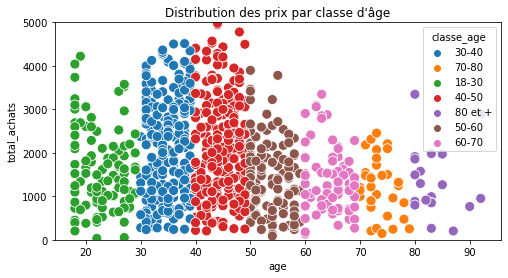

In [67]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_final.sample(1000), x='age', y='total_achats', hue='classe_age', s=100)
plt.title('Distribution des prix par classe d\'âge')
plt.ylim([0,5000])
plt.show()

H0 = les 2 variables ne sont pas correlées

H1 = les 2 variables sont corrélées

Conditions d'application du test de Pearson :

- Ne peut pas être appliqué aux variables ordinales.
- La taille de l’échantillon doit être modérée pour une bonne estimation.
- Les valeurs aberrantes peuvent conduire à des valeurs trompeuses, ce qui signifie non robuste avec les valeurs aberrantes.

In [68]:
sample_df = df_final.sample(5000)
stat, p = stats.pearsonr(sample_df['age'], sample_df['total_achats'])
print('Test de Pearsonr \n')
print('p-value :', p, '\nstat :', stat)

#Test au seuil de 5%
if p > 0.05:
    print('H0: Pas de corrélation entre les deux variables')
else:
    print('H1: Corrélation entre les deux variables')

Test de Pearsonr 

p-value : 2.7045012500975127e-06 
stat : -0.06629950056104911
H1: Corrélation entre les deux variables


#### Catégorie et âge (ANOVA)

Le test statistique ANOVA est utilisé pour comparer deux ou plusieurs moyennes ensemble. Elle est utile pour vérifier la corrélation entre une qualitative (avec plus de deux modalités) et une quantitative.

categ
0.0    43.902580
1.0    47.649193
2.0    25.940005
Name: age, dtype: float64


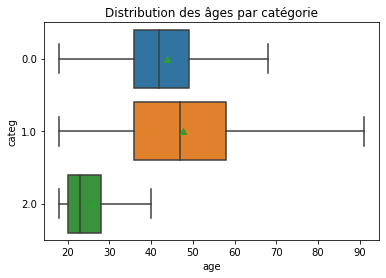

In [69]:
# Moyenne des âge dans chaque catégorie
print(df_final.groupby('categ').mean()['age'])
sns.boxplot(data=df_final, x='age', y='categ', orient='h', showfliers=False, showmeans=True)
plt.title('Distribution des âges par catégorie')
plt.show()

H0: Les moyennes de chaque groupe sont égales si p-value > 5%

H1: Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%

La pertinence du test ANOVA repose sur la validation de plusieurs hypothèses :

- L’indépendance entre les échantillons de chaque groupe
- L’égalité des variances.
- La normalité des résidus.

#### L'indépendance

In [70]:
df_final.categ.unique()

array([0., 1., 2.])

On a 3 categorires de livre (categorie0, categorie1, categorie2), on peut dire que les echantillons sont indépendants.

#### Normalité des résidus

L’objectif est de s’assurer que les résidus suivent une loi normale afin de ne pas affirmer qu’il existe une différence de moyenne entre les groupes qui serait causée par le hasard.

On utilise le test de Shapiro-Wilk pour tester la normalité des résidus où :

- H0: Les résidus suivent une loi normale si p-value > 5%
- H1: Les résidus ne suivent pas une loi normale si p-value < 5%

Normalité des résidus (Shapiro)

stats : 0.9651251435279846 
p-value : 3.899125414595082e-33
H0 rejetée : distribution probablement pas normale


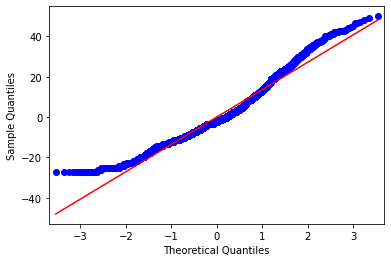

In [71]:
#diagramme Quantile-Quantile
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='s')


# Test de Shapiro sur les résidus
print('Normalité des résidus (Shapiro)')
stats, p = stats.shapiro(model.resid)
print('\nstats :', stats,
    '\np-value :', p)

#Test au seuil de 5%
if p>.05:
    print('H0 acceptée : distribution normale')
else:
    print('H0 rejetée : distribution probablement pas normale')

#### L’égalité des variances

On cherche à démontrer que les variances de chaque categorie sont égales.

categ
0.0    125.732763
1.0    240.132092
2.0     95.787728
Name: age, dtype: float64

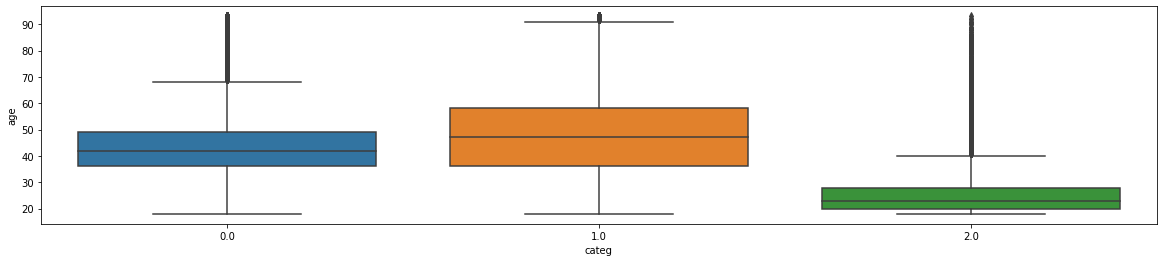

In [72]:
plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="categ", y="age", data=df_final)

df_final.groupby("categ")['age'].agg('var')

les boites à moustaches montrent une inégalité des variances, mais test de Bartlett ou Levene qui permet de tester si les variances sont significativement différentes ou non avec :

- H0 : Les variances de chaque groupe sont égales si p-value > 5%
- H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

In [73]:
# Test de Levene sur les 3 catégories
from scipy.stats import levene
samples = 5000
a = df_final[df_final['categ']==0]['age'].sample(samples).values
b = df_final[df_final['categ']==1]['age'].sample(samples).values
c = df_final[df_final['categ']==2]['age'].sample(samples).values
stats, p = levene(a, b, c)
print('\nstats :', stats,
    '\np-value :', p)

#Test au seuil de 5%
if p > 0.05:
    print('H0: les variances sont égales')
else:
    print('H1: les variances ne sont pas égales')


stats : 988.8615106902231 
p-value : 0.0
H1: les variances ne sont pas égales


In [74]:
# Test de Bartlett sur les 3 catégories
from scipy.stats import bartlett
samples = 5000
a = df_final[df_final['categ']==0]['age'].sample(samples).values
b = df_final[df_final['categ']==1]['age'].sample(samples).values
c = df_final[df_final['categ']==2]['age'].sample(samples).values
stats, p = bartlett(a, b, c)
print('\nstats :', stats,
    '\np-value :', p)

#Test au seuil de 5%
if p > 0.05:
    print('H0: les variances sont égales')
else:
    print('H1: les variances ne sont pas égales')


stats : 1232.6735792359286 
p-value : 2.1297727937695833e-268
H1: les variances ne sont pas égales


Ni le test de Levene ni celui ne Bartlett ne valide l'égalite des variances entre les differents groupes. Les conditions d'application du test ANOVA ne sont pas remplies.

 Dans le cas où la condition d'homoscédasticité n'est pas remplie, on peut utiliser le test de Welch

In [75]:
# Test de Welch entre catégorielle et quantitative
from scipy.stats import ttest_ind
sample_df = df_final.sample(5000)
stat, p = ttest_ind(sample_df['age'], sample_df['categ'])
print('Test de Welch (si absence d\'homoscédasticité)\n')
print('p-value :', p, '\nstat :', stat)

#Test au seuil de 5%
if p > 0.05:
    print('H0: les moyennes des échantillons sont égales')
else:
    print('H1: une ou plus des moyennes des échantillons sont inégales')

Test de Welch (si absence d'homoscédasticité)

p-value : 0.0 
stat : 227.02648479753356
H1: une ou plus des moyennes des échantillons sont inégales
